# 导入库

In [1]:
import rasterio
import numpy as np
import matplotlib.pyplot as plt
import random
from scipy.signal import savgol_filter

# 在图像上生成随机点

In [2]:
# 读取TIF影像
def read_tif(file_path):
    with rasterio.open(file_path) as src:
        img = src.read()
    return img

# 在影像上随机生成点
def generate_random_points(rows, columns, num_points):
    points = [(random.randint(0, rows-1), random.randint(0, columns-1)) for _ in range(num_points)]
    return points

# 用户自定义精度评定

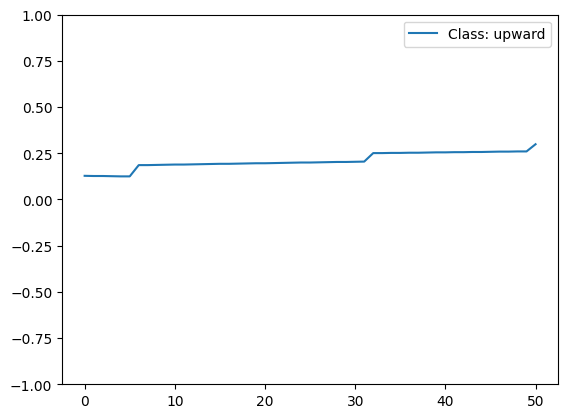

Invalid input. Please enter 0 or 1.


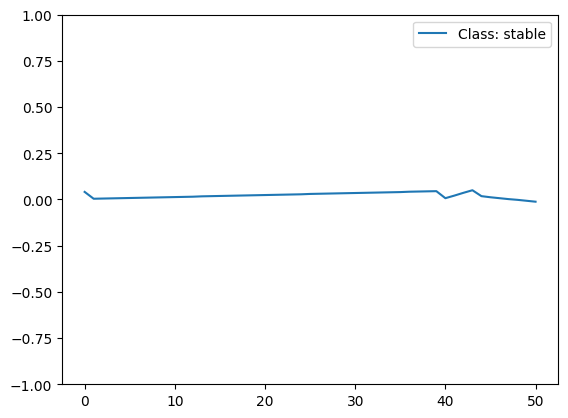

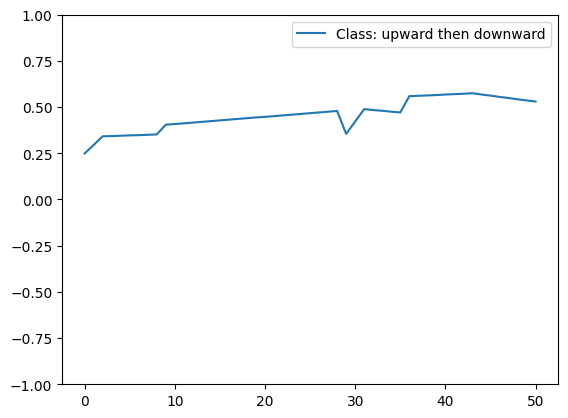

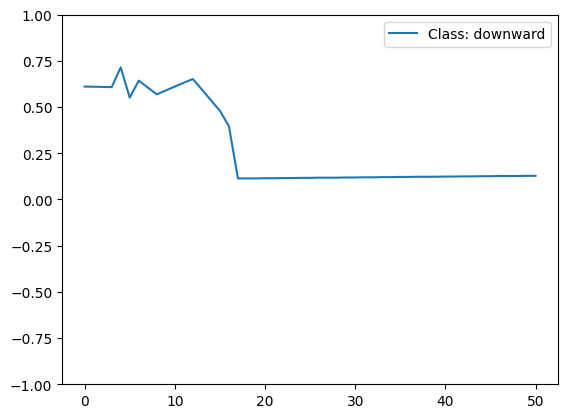

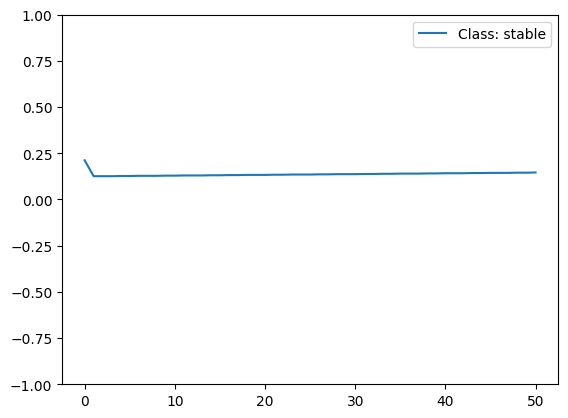

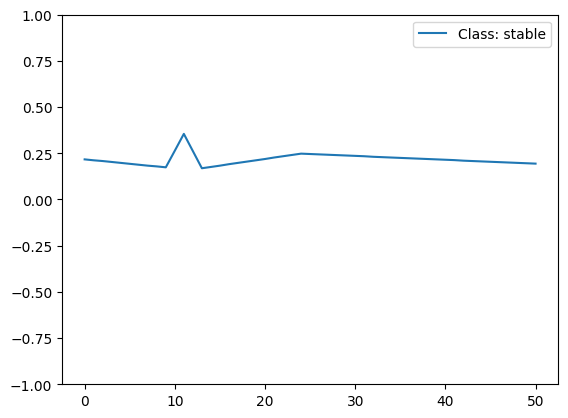

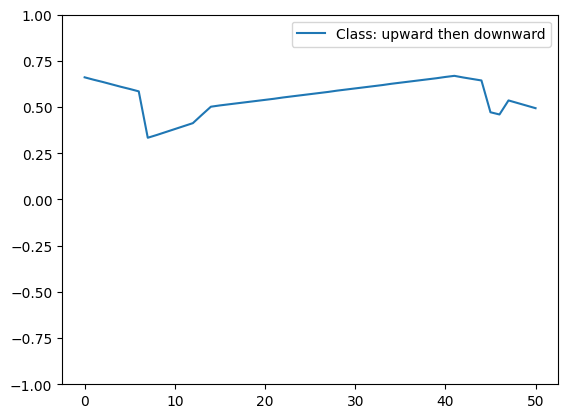

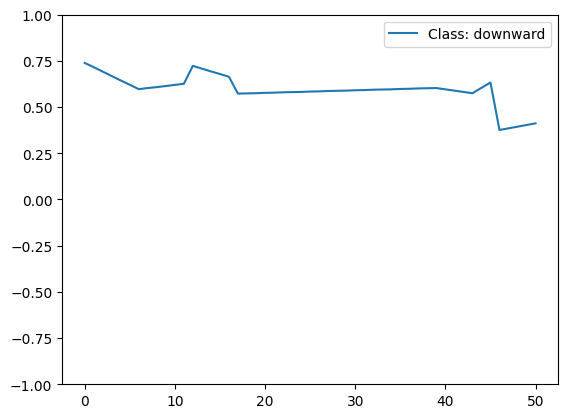

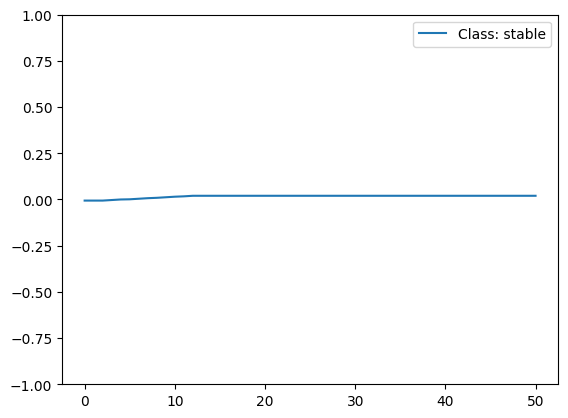

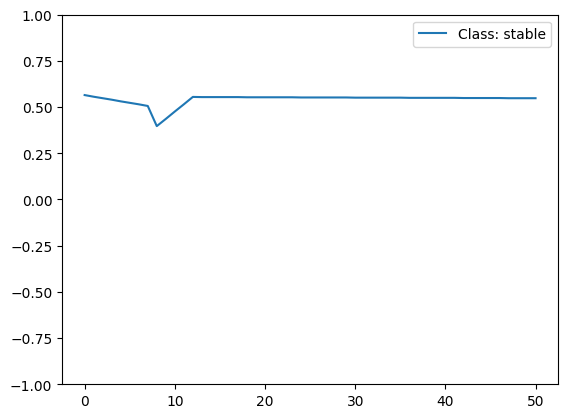

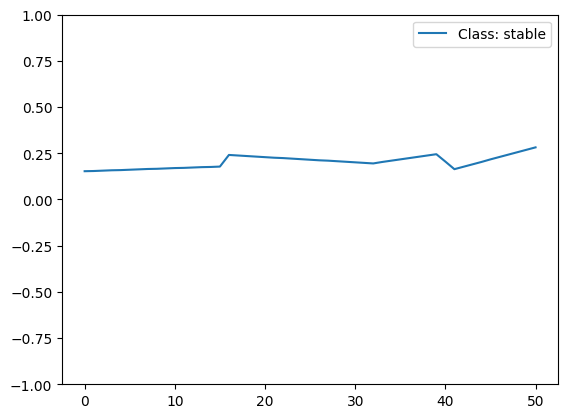

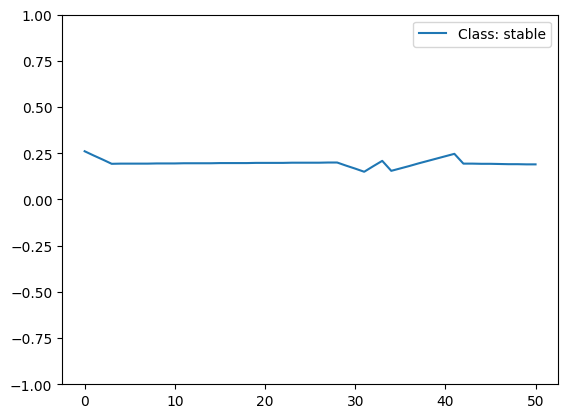

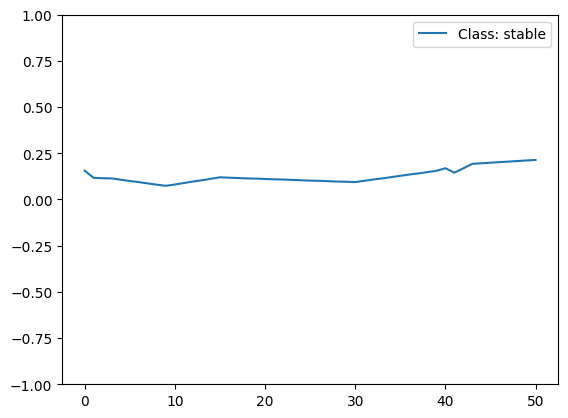

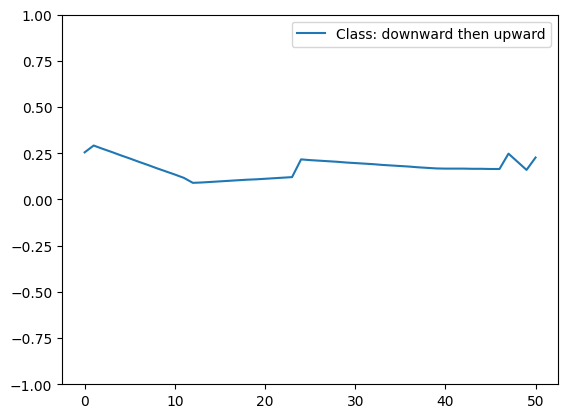

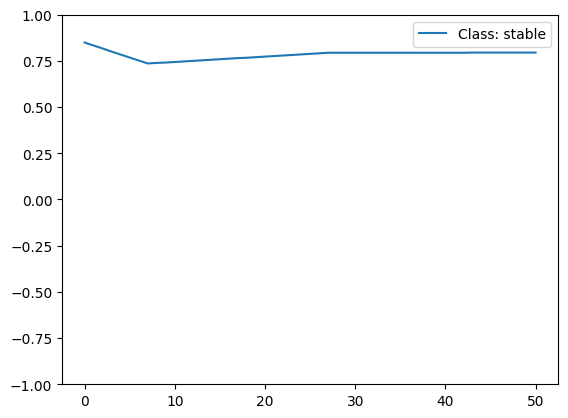

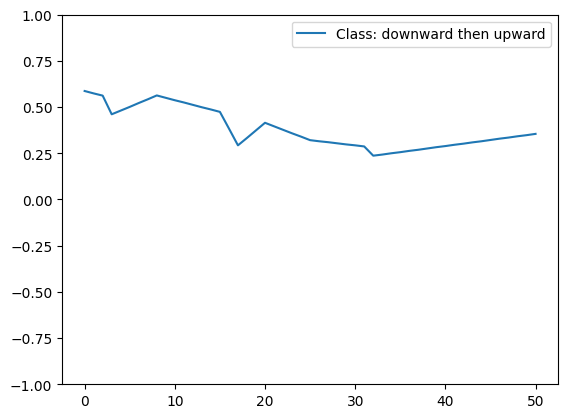

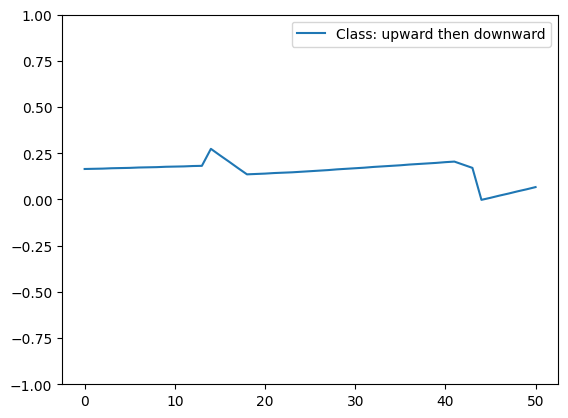

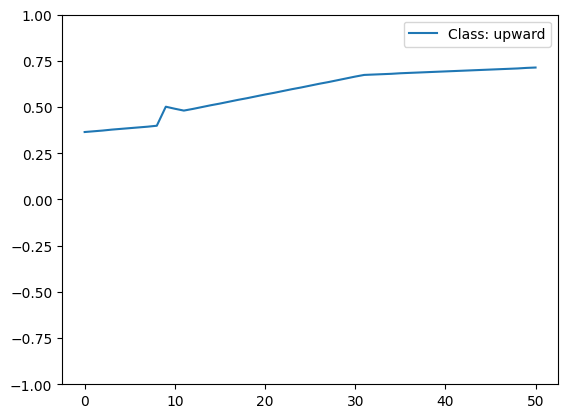

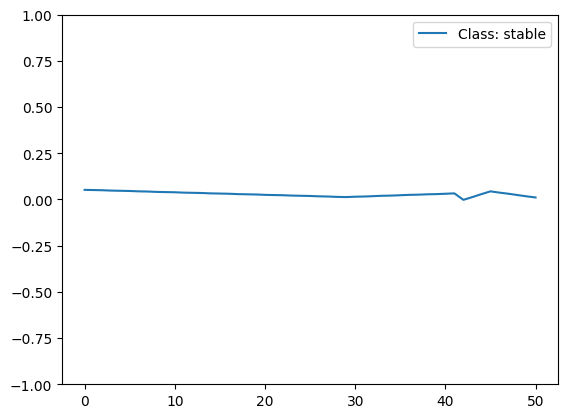

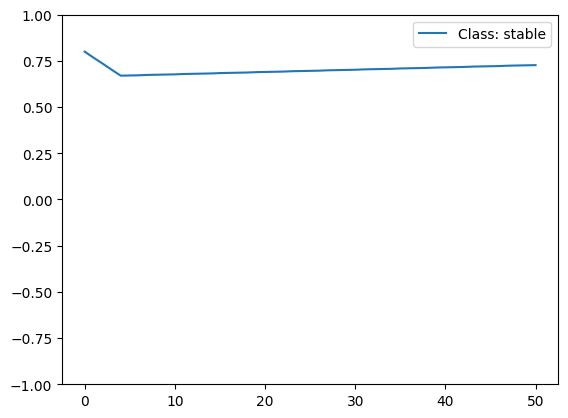

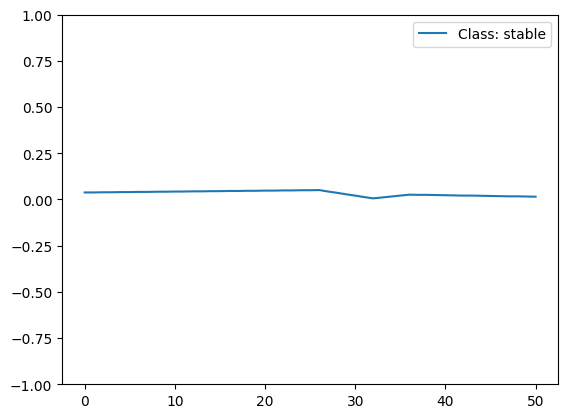

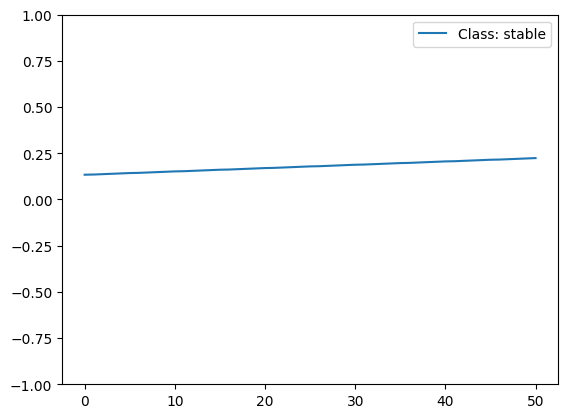

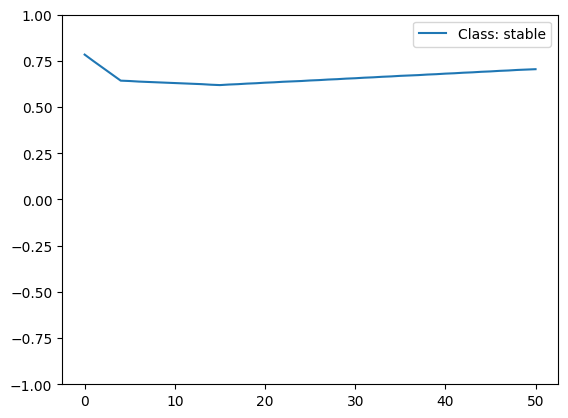

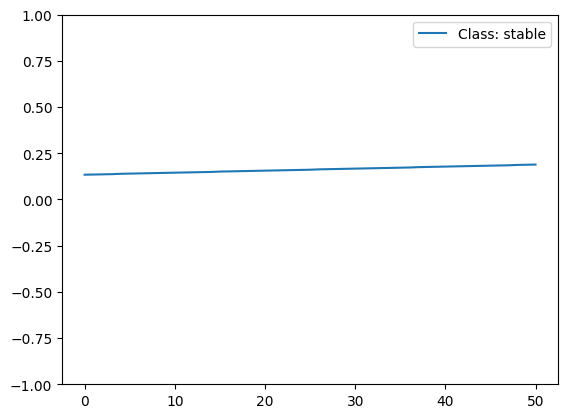

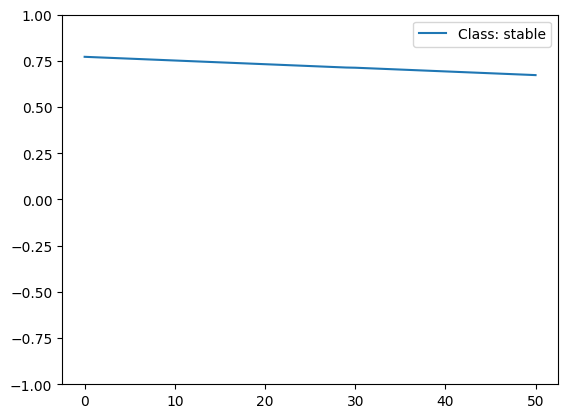

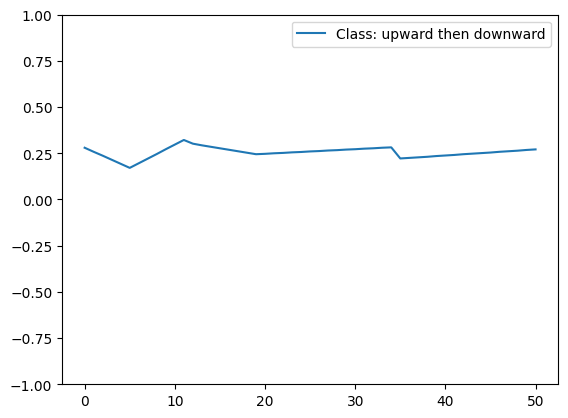

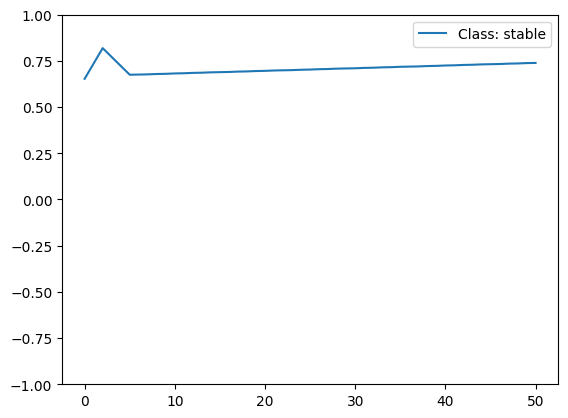

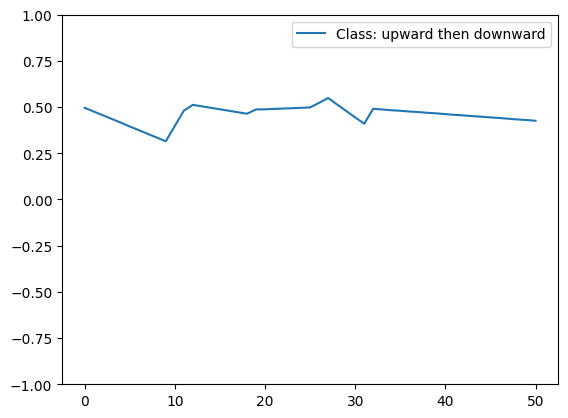

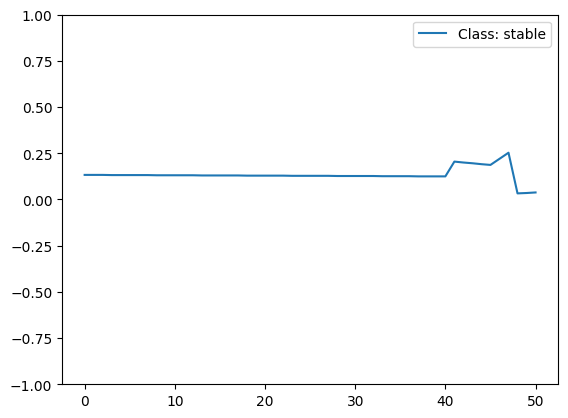

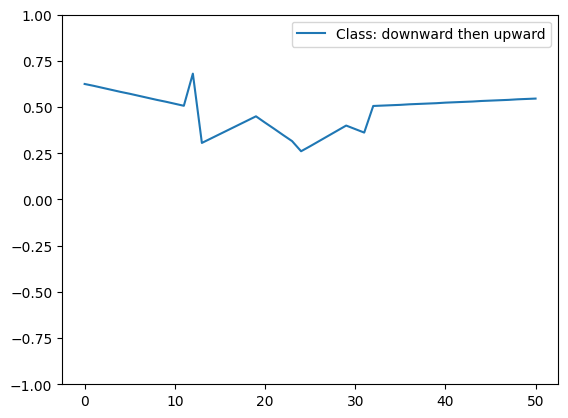

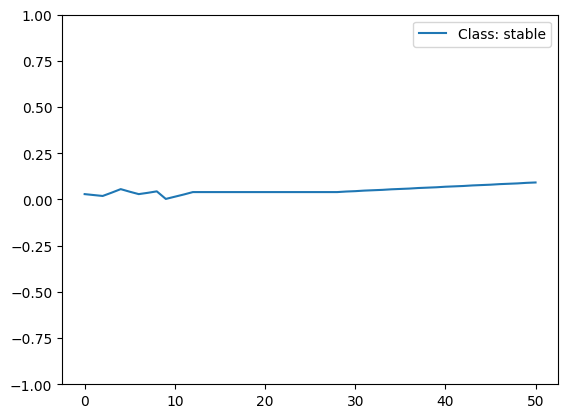

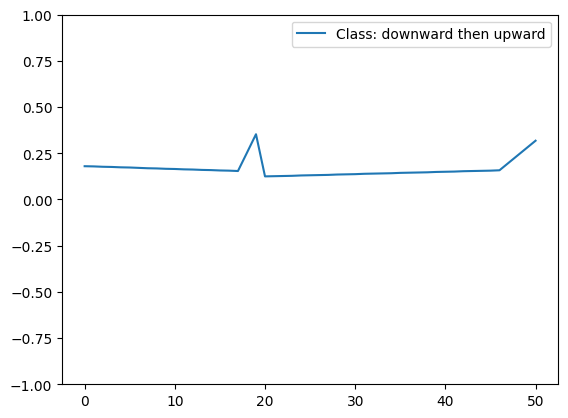

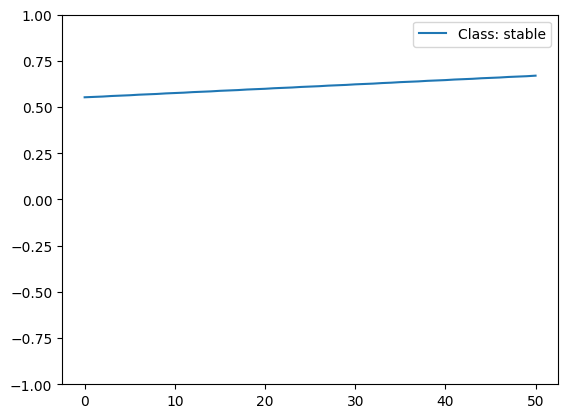

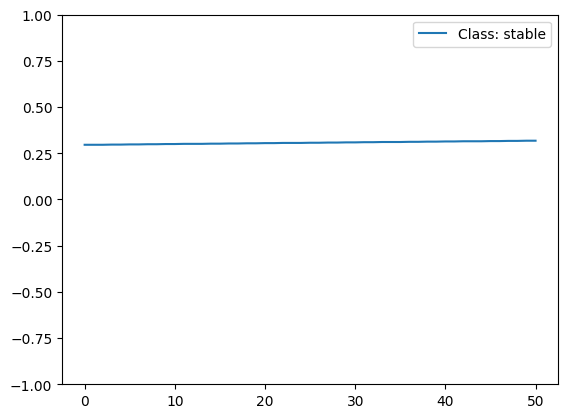

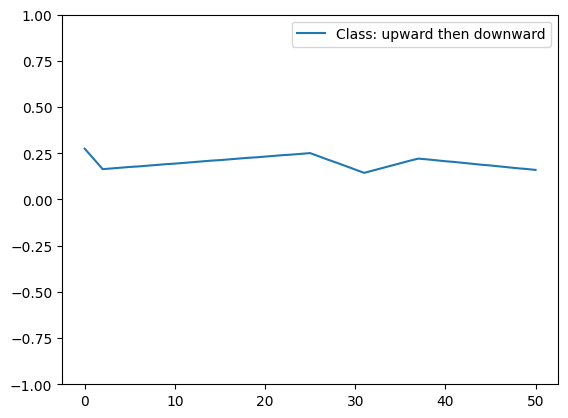

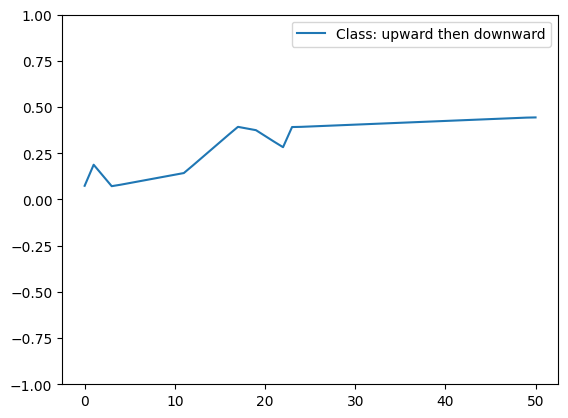

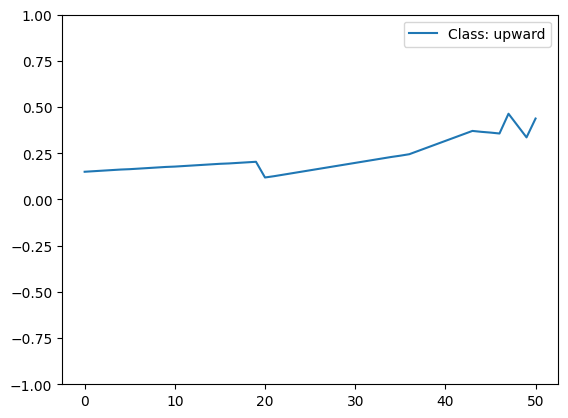

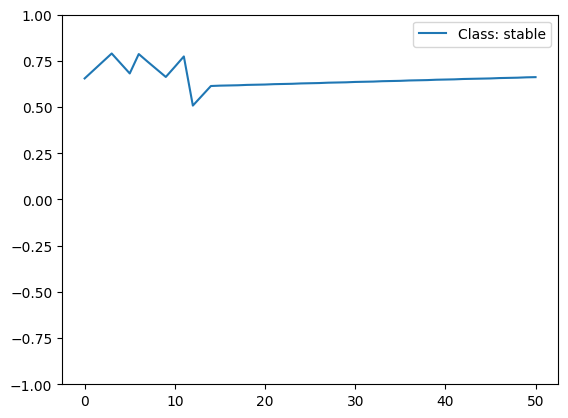

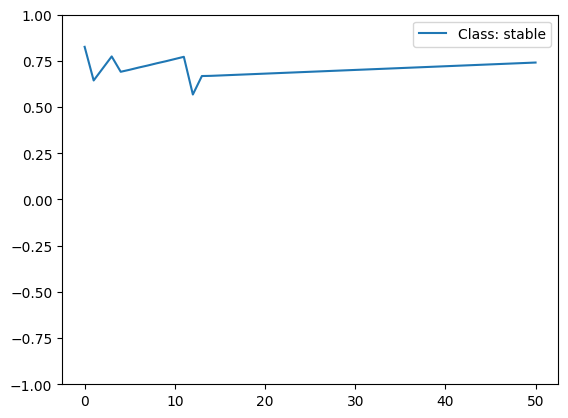

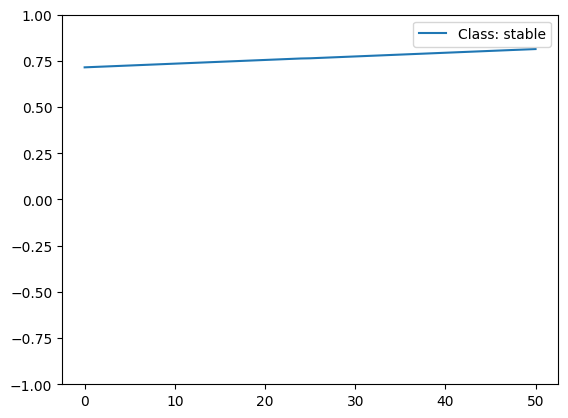

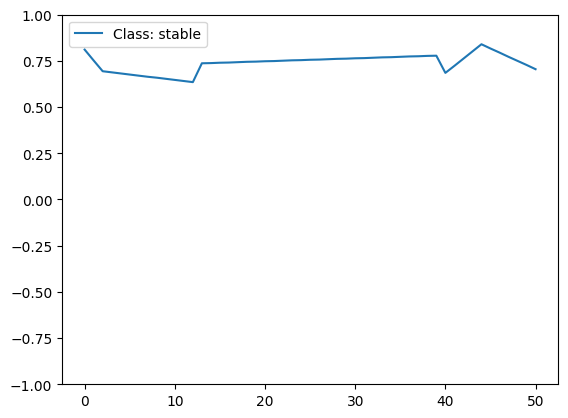

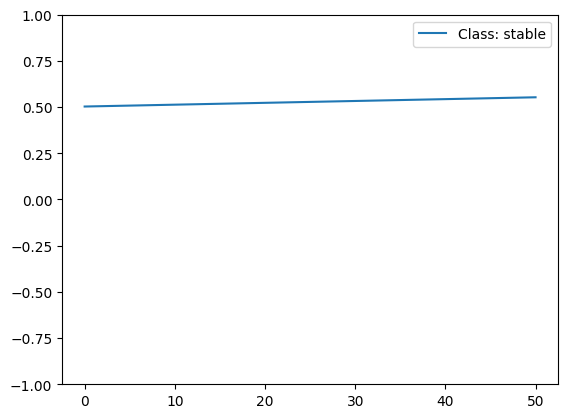

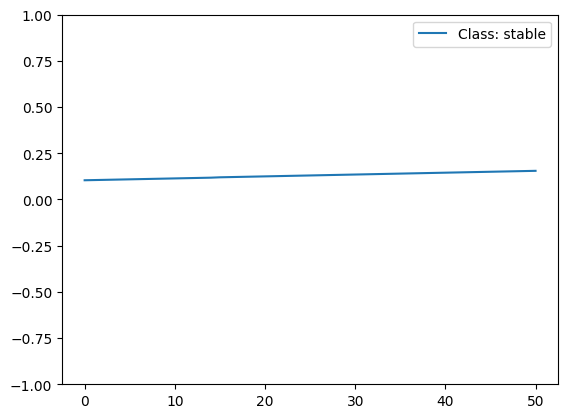

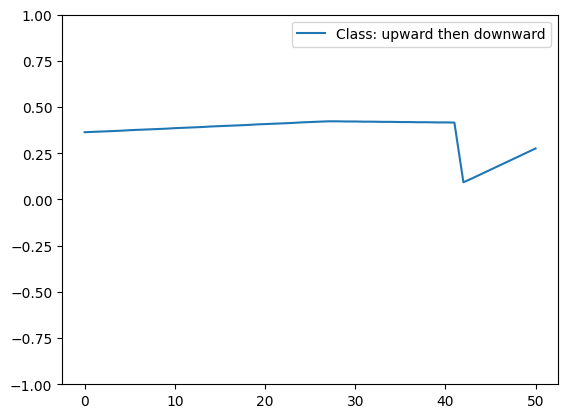

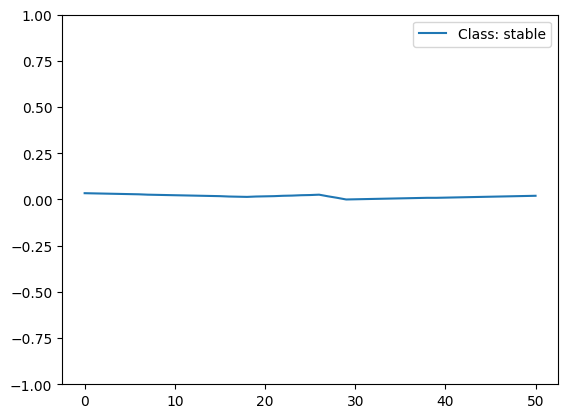

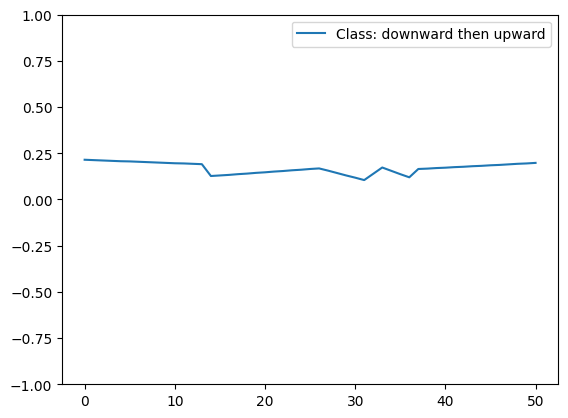

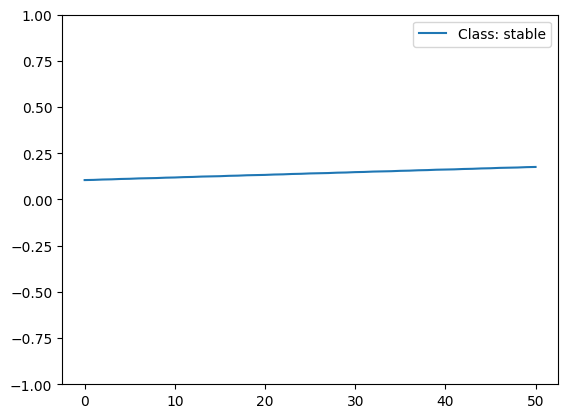

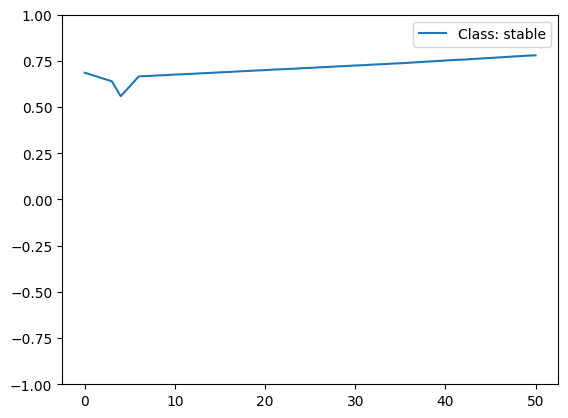

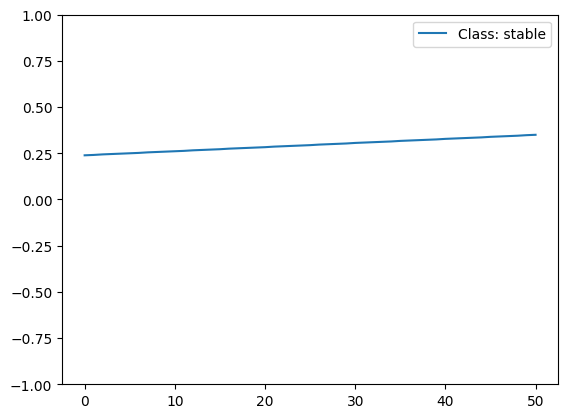

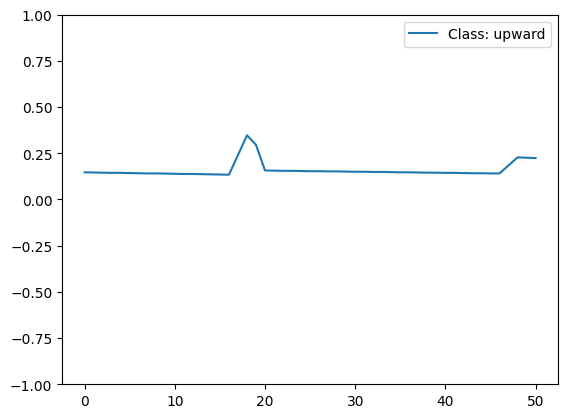

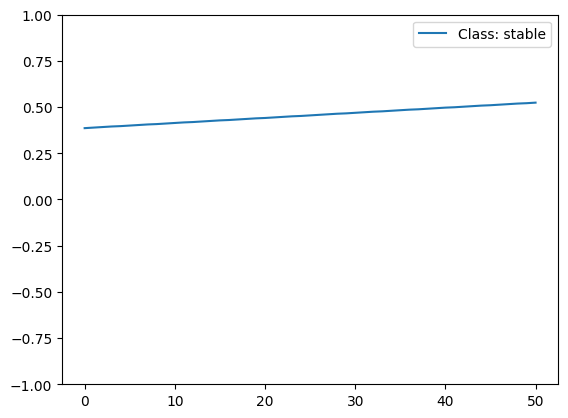

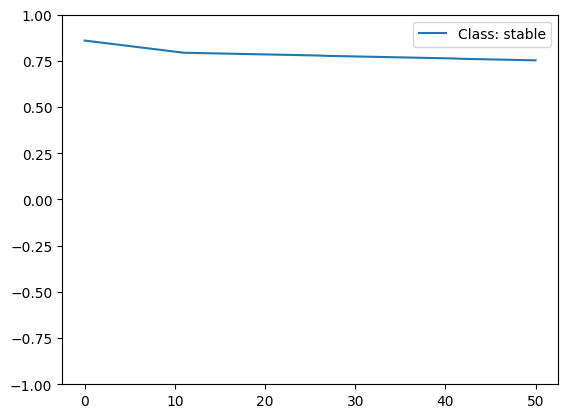

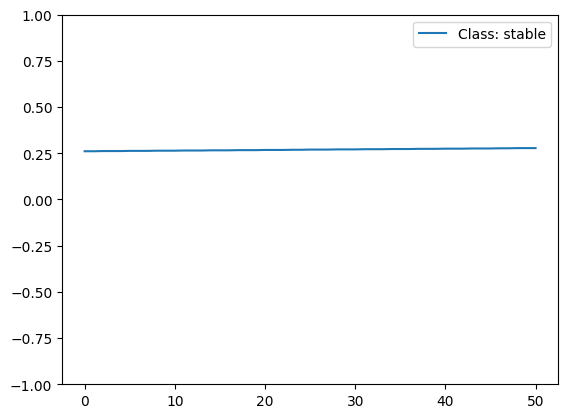

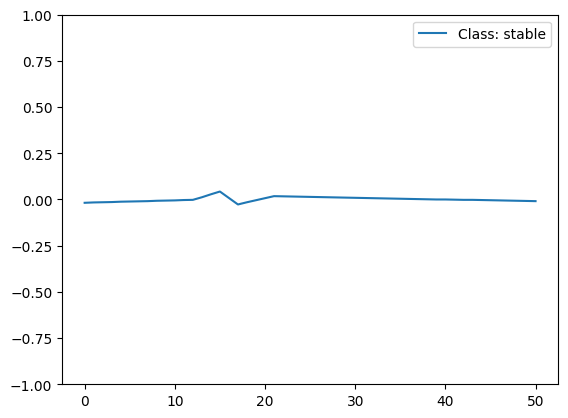

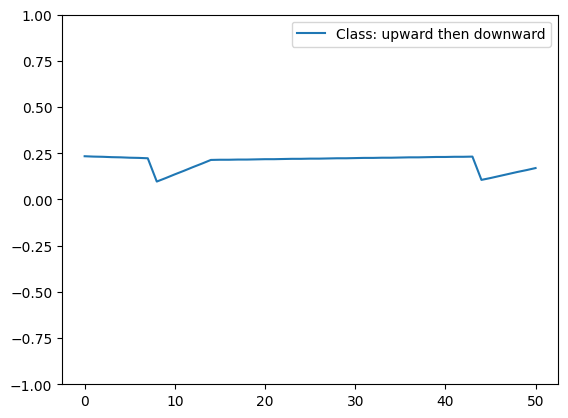

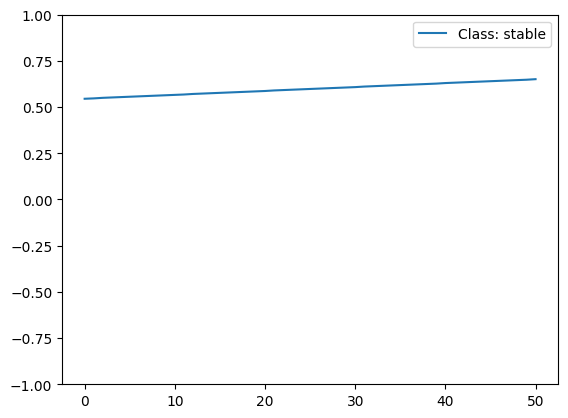

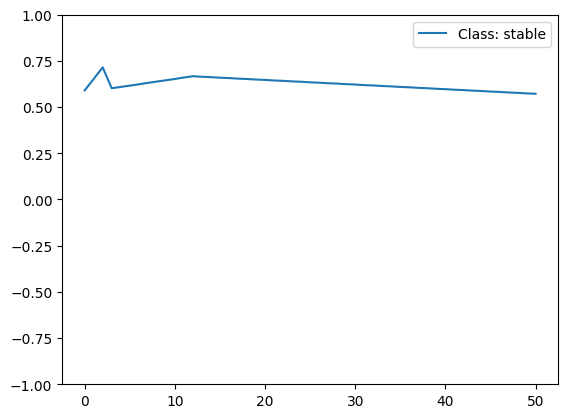

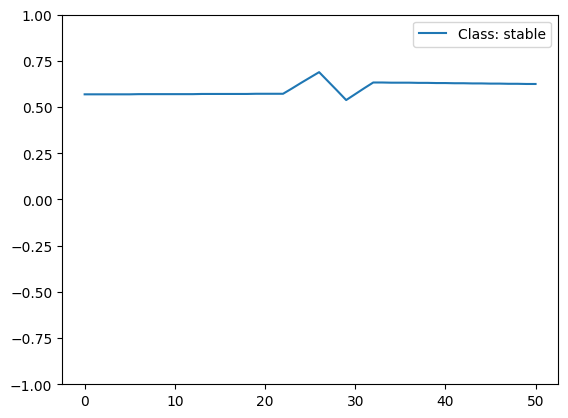

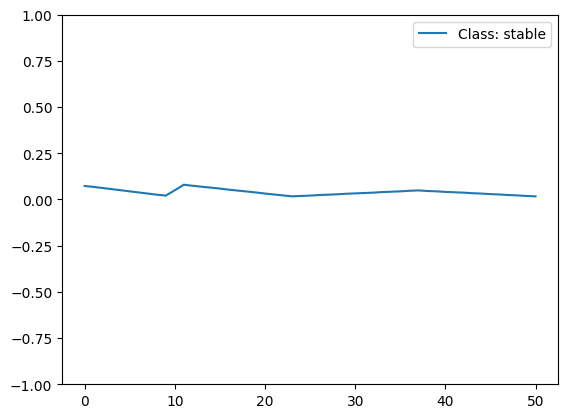

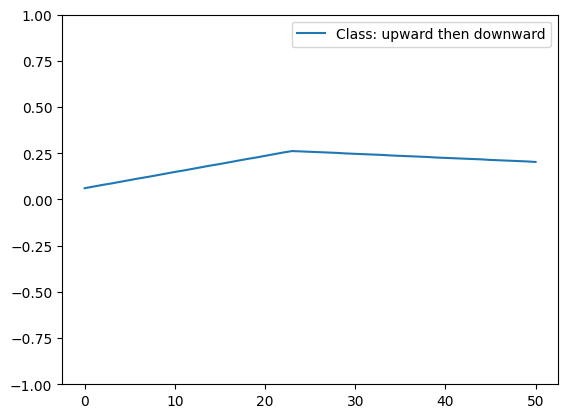

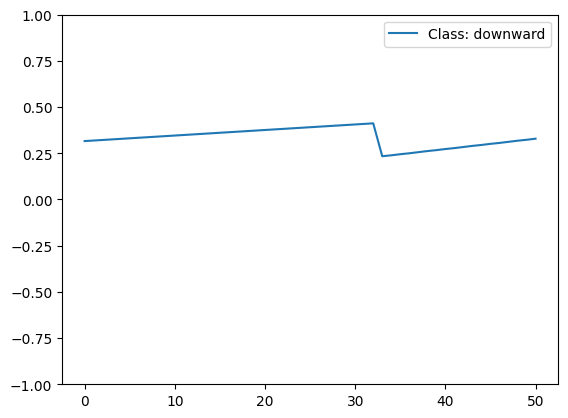

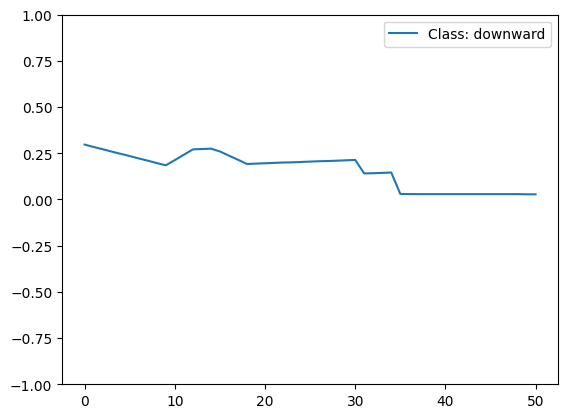

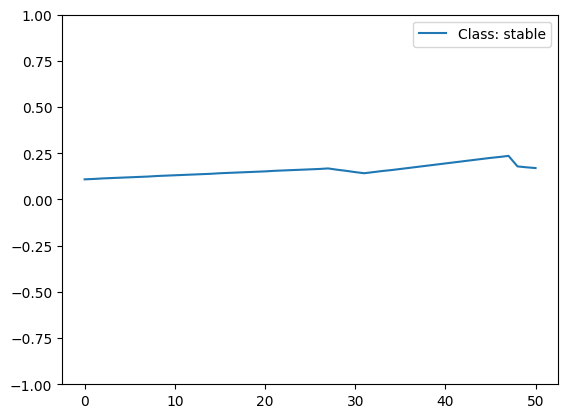

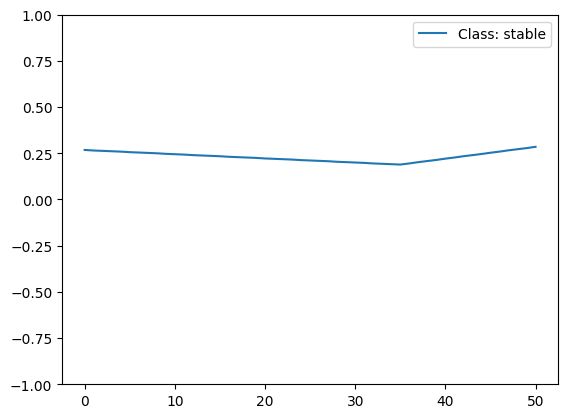

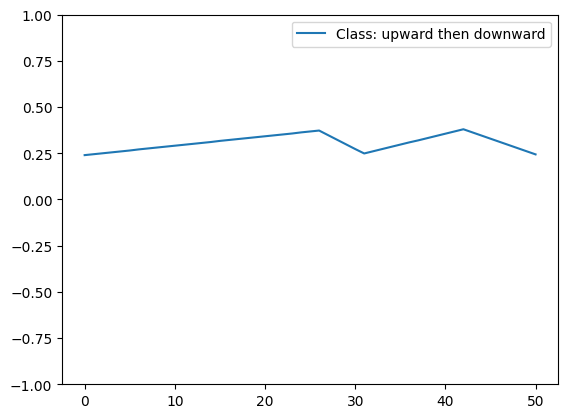

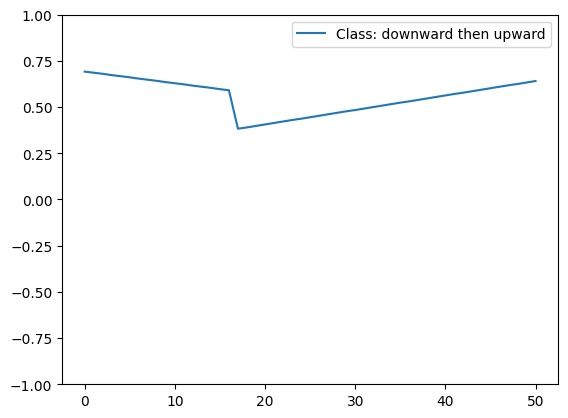

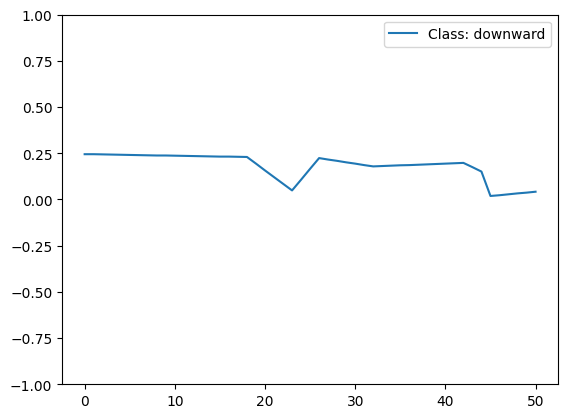

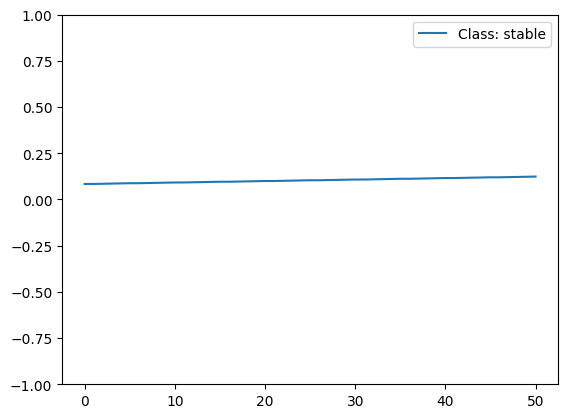

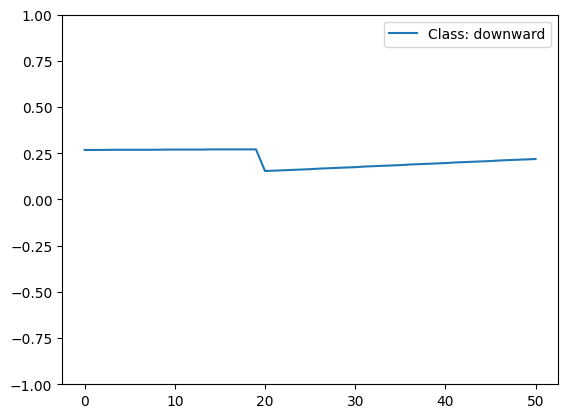

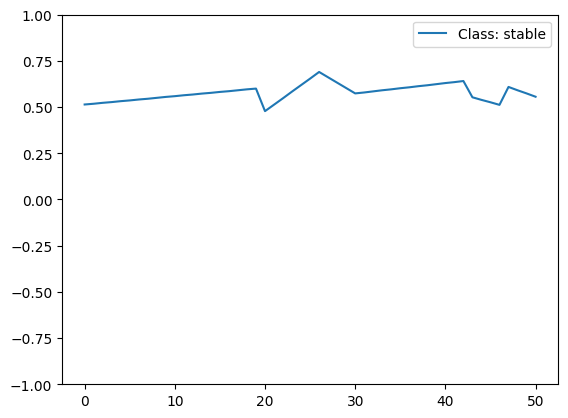

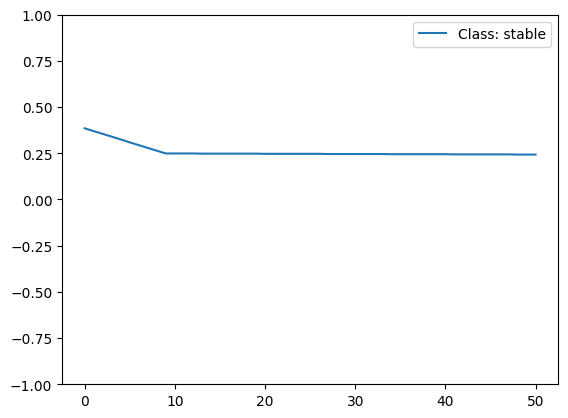

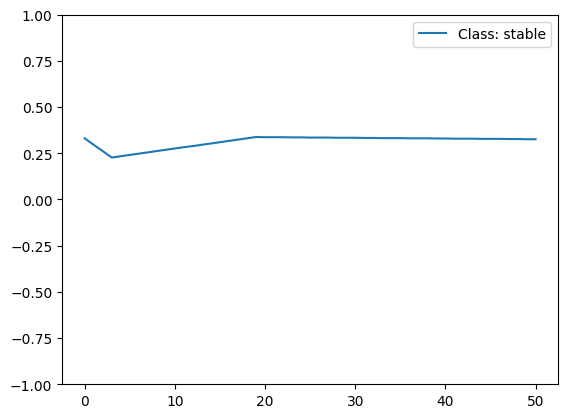

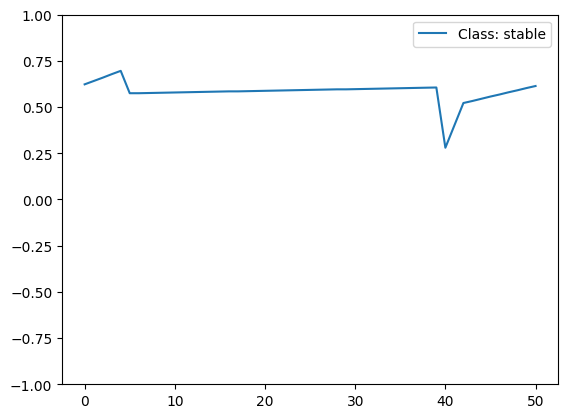

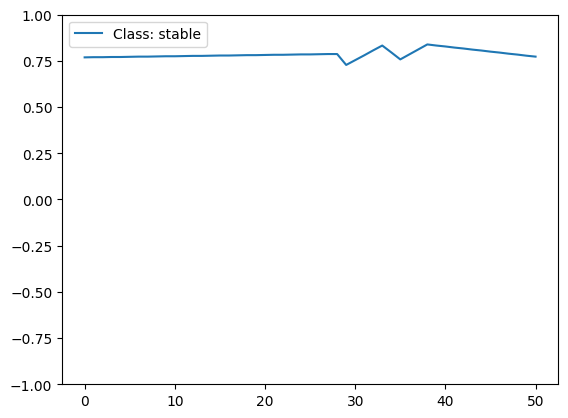

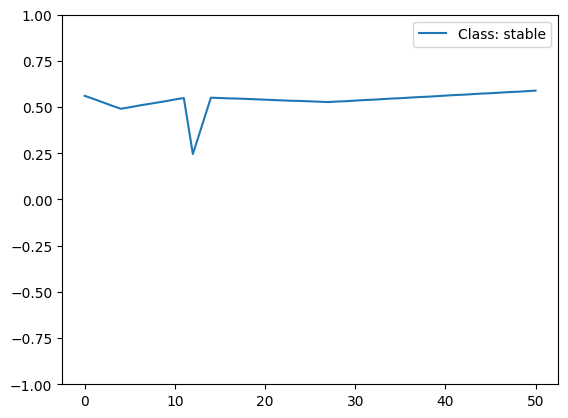

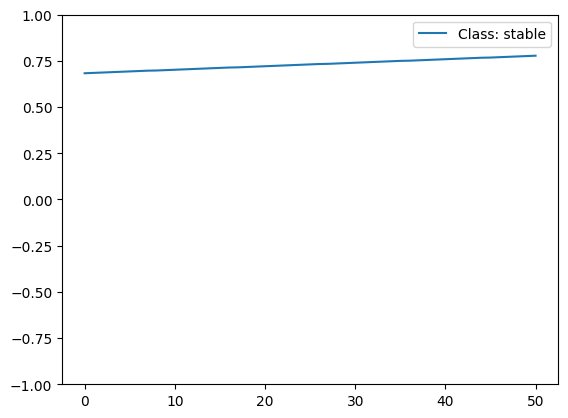

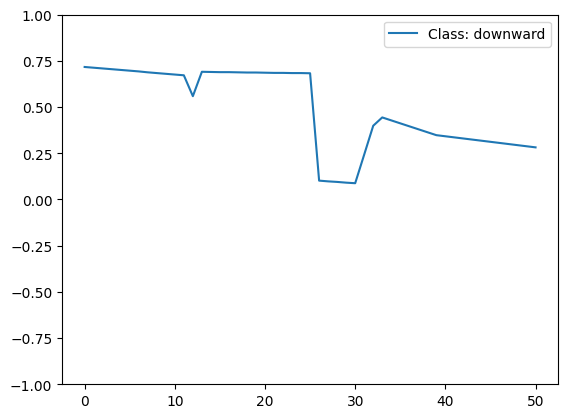

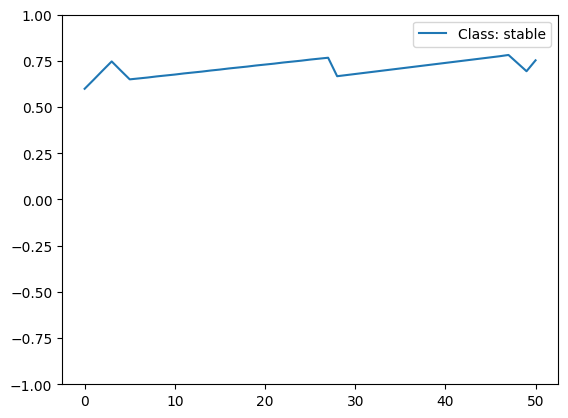

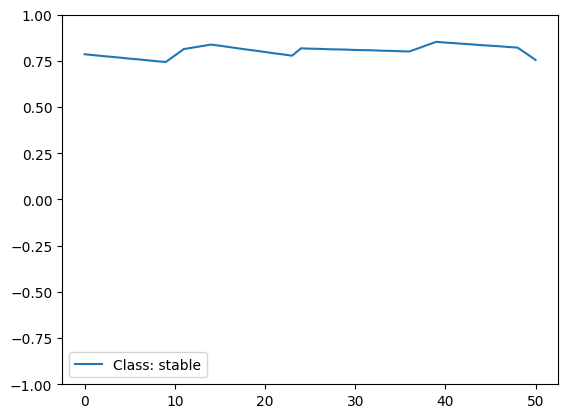

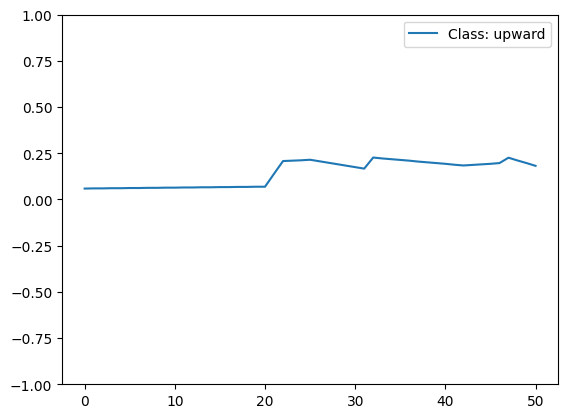

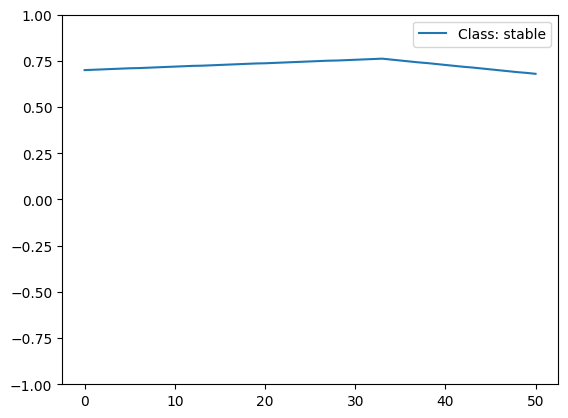

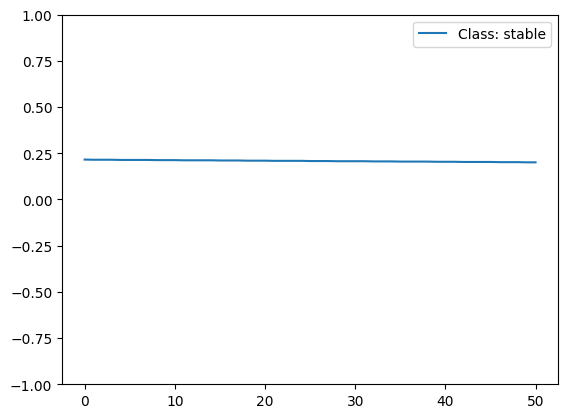

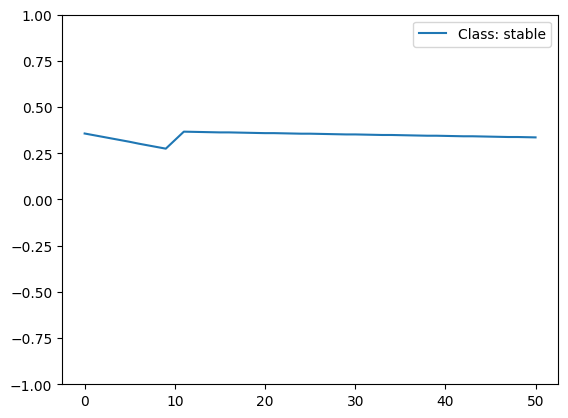

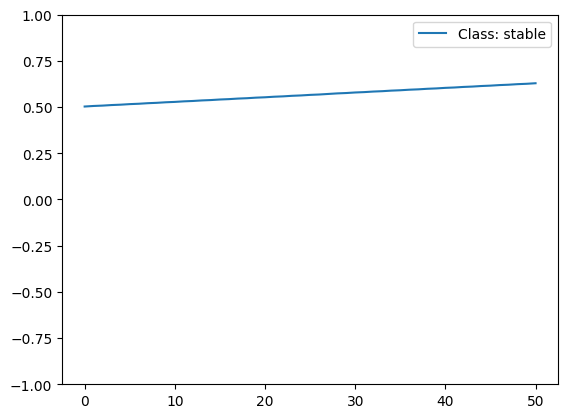

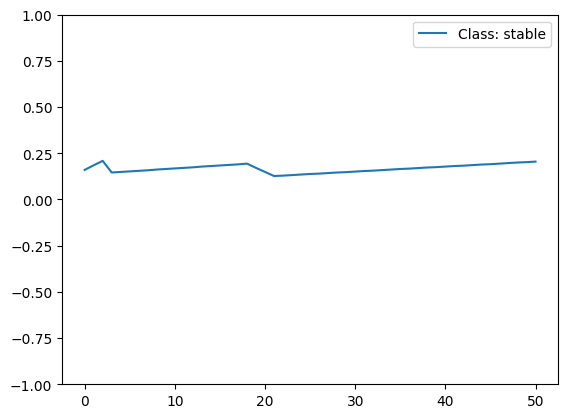

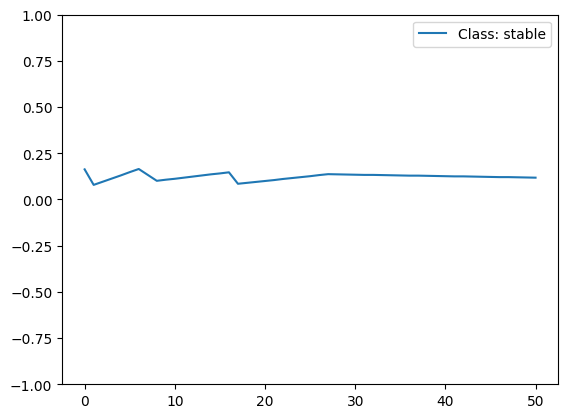

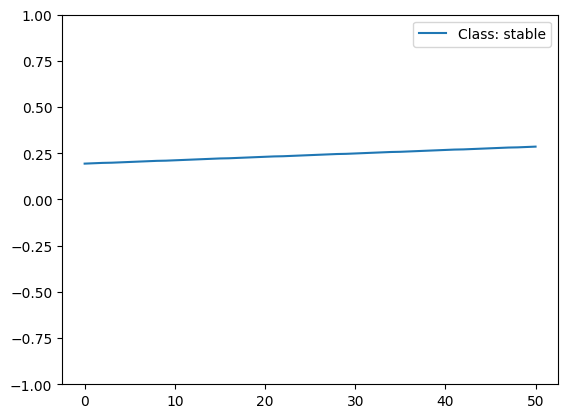

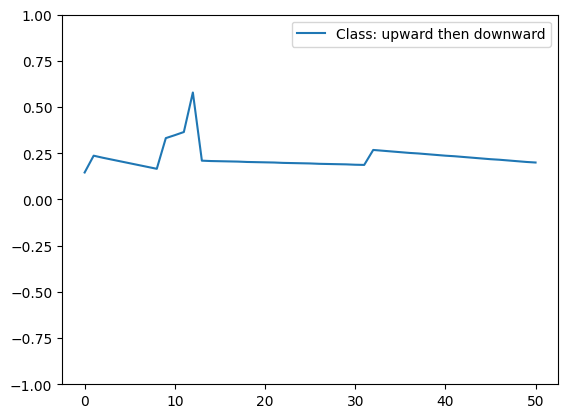

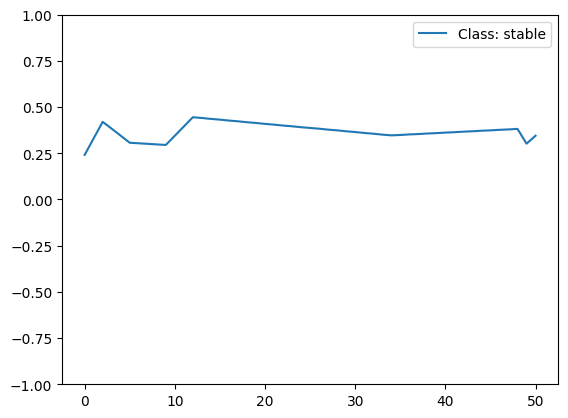

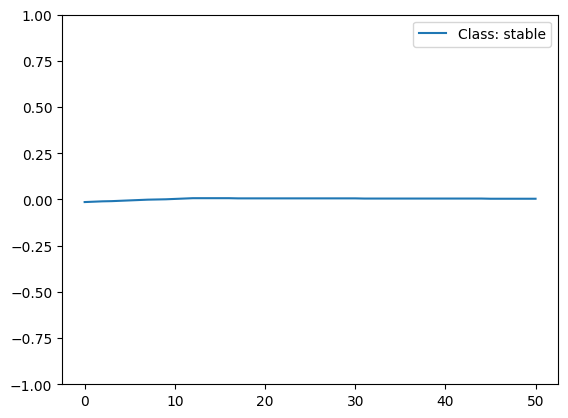

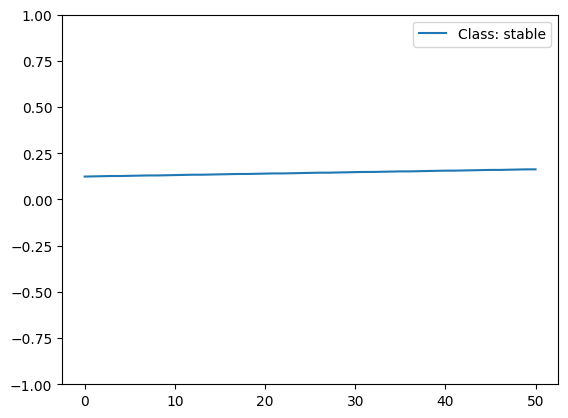

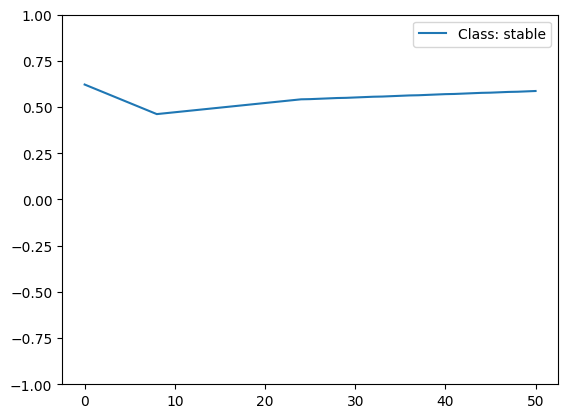

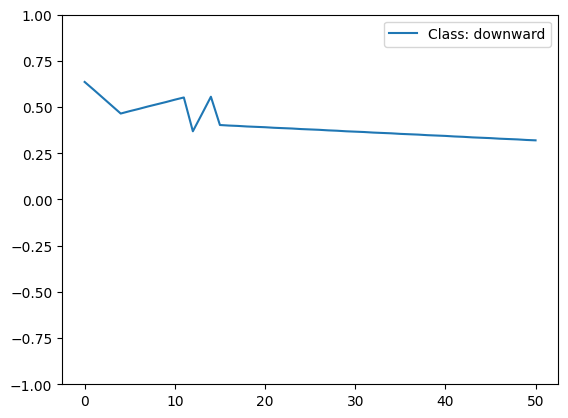

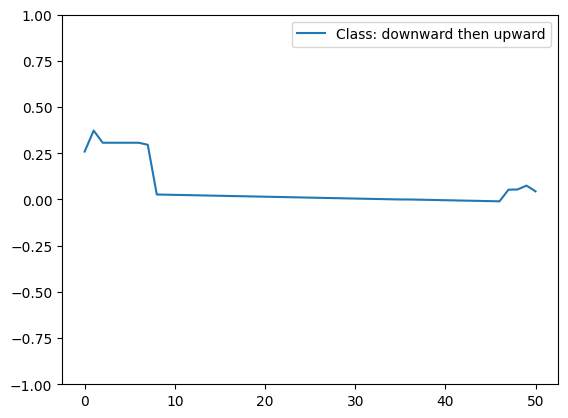

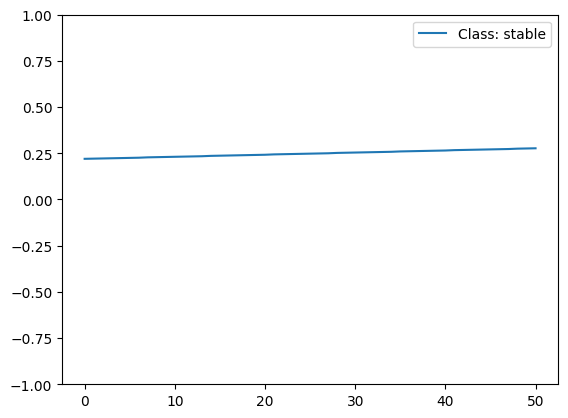

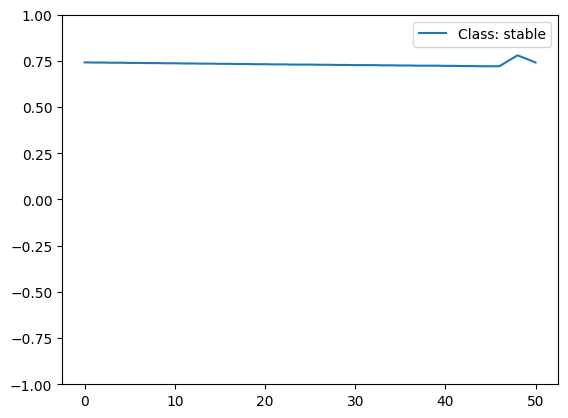

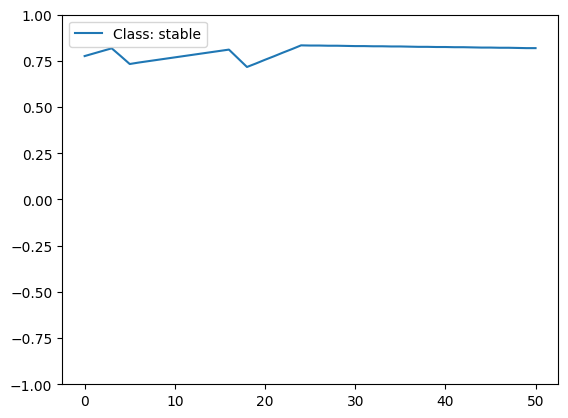

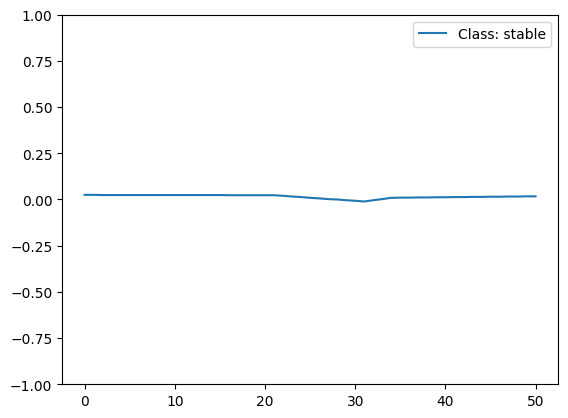

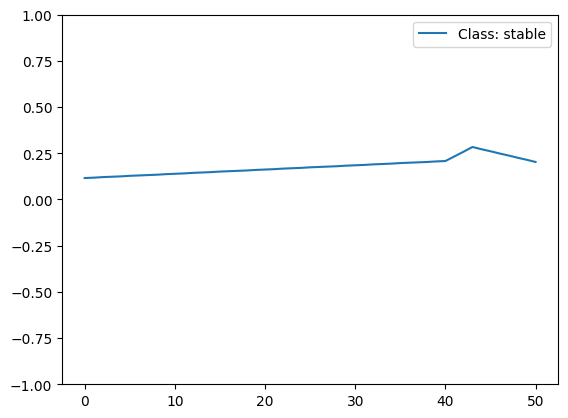

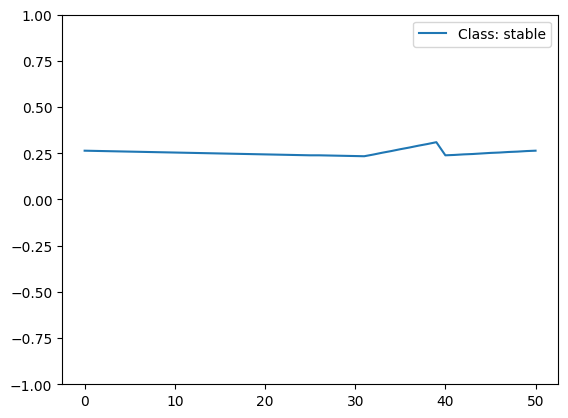

Accuracy: 77.0%


In [3]:
imgs_path = 'F:/esriContest/composited/041032/slc_ndvi_fit_1972_2022.tif'  # 时序影像数据 一个波段对应一个时间节点
cls_path = 'F:/esriContest/composited/041032/classify_1/slc_ndvi_inceptiontime_cls.tif'  # 分类结果影像数据
# 分类值对应的类别
cls_dict = {
  0: 'downward',
  1: 'downward then upward',
  2: 'upward',
  3: 'upward then downward',
  4: 'stable',
  5: 'multiple disturbances',
}

num_points = 100  # 随机点数

# 51:cnn classifier - Accuracy: 21.0%
# 52:inception time classifier - Accuracy: 47.0% 77%
# 53:minirocket classifier - Accuracy: 7.0%
# 54:transformer classifier - Accuracy: 18.0%
# 55:time series forest classifier - Accuracy 15.0%

correct_count = 0
ts_img = read_tif(imgs_path) # 51, 628, 620 : 51个时间节点, 628行, 620列
rows, columns = ts_img.shape[1], ts_img.shape[2] # 行数和列数
cls_img = read_tif(cls_path) # 1, 628, 620 : 1个波段, 628行, 620列

# 生成随机点
points = generate_random_points(rows, columns, num_points)

# 计算所有点的值
point_values = np.array([ts_img[:, p[0], p[1]] for p in points])

# 应用Savitzky-Golay滤波器
window_size = 11  # 窗口大小，应为奇数
polyorder = 2  # 多项式阶数
filtered_values = savgol_filter(point_values, window_size, polyorder, axis=0)
# for i in range(point_values.shape[1]):
#    filtered_values[:, i] = savgol_filter(point_values[:, i], window_size, polyorder)

# 遍历每个点
for i, point in enumerate(points):
    # 读取该点对应的分类值
    result_value = cls_img[0, point[0], point[1]]
    # 绘制该点在时序影像上的时间序列
    plt.plot(point_values[i], label='Original')
    plt.plot(filtered_values[i], label='SG Filtering')
    plt.title(f"Class: {cls_dict[result_value]}")
    plt.legend()
    plt.show()
    # 用户通过观察时间序列判断分类结果是否准确
    while True:
        try:
            user_input = input("Enter f (False) or t (True): ")
            if user_input == 'f':
                break
            elif user_input == 't':
                correct_count += 1
                break
            else:
                raise ValueError("Invalid input. Please enter t or f.")
        except ValueError as e:
            print(e)

# 计算准确率
accuracy = correct_count / num_points
print(f"Accuracy: {accuracy*100}%")